In [2]:
using Revise, LazySets, IntervalConstraintProgramming, ModelingToolkit

In [7]:
using IntervalConstraintProgramming, IntervalArithmetic, Plots

dom = IntervalBox(-2 .. 2, -2 .. 2)
C = @constraint (x^4 + y^4 - 1) * (x^2 + y^2 - 2) + x^5 * y <= 0
p = pave(C, dom, 0.01)

plot(p.inner, lw=1, ratio=1, lab="f(x, y) ≤ 0", title="")
plot!(p.boundary, lw=1, ratio=1, lab="boundary")

In [9]:
typeof(p)

Paving{2,Float64}

In [4]:
dir = OctDirections(2)
HI = UnionSetArray(convert.(Hyperrectangle, p.inner));
Pinner = [HalfSpace(d, ρ(d, HI)) for d in dir] |> HPolyhedron;

In [8]:
plot!(Pinner)

In [10]:
Paving

Paving

In [16]:
using LazySets.Approximations: AbstractDirections

function LazySets.overapproximate(p::Paving{L, N}, dirs::AbstractDirections{N, VN}) where {L, N, VN}
    # enclose outer approximation
    Uouter = UnionSetArray(convert.(Hyperrectangle, p.boundary))
    constraints = [HalfSpace(d, ρ(d, Uouter)) for d in dirs]
    return HPolyhedron(constraints)
end

# alias with HPolytope type as second argument
function LazySets.overapproximate(p::Paving{L, N}, ::Type{<:HPolyhedron}, dirs::AbstractDirections{N, VN}) where {L, N, VN}
    return overapproximate(p, dirs)
end

In [18]:
q = overapproximate(p, OctDirections(2))

HPolyhedron{Float64,SparseArrays.SparseVector{Float64,Int64}}(HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}[HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [1]  =  1.0
  [2]  =  1.0, 1.875169338460729), HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [1]  =  1.0
  [2]  =  -1.0, 2.6744672838247423), HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [1]  =  -1.0
  [2]  =  1.0, 2.671880447307836), HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [1]  =  -1.0
  [2]  =  -1.0, 1.87538325066831), HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [1]  =  1.0, 1.6924690616853475), HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [2]  =  1.0, 1.4142135623730954), HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [2]  =  -1.0, 1.4142135623755048), HalfSpace{Float64,SparseArrays.SparseVector{Float64,Int64}}(  [1]  =  -1.0, 1.7001367860550356)])

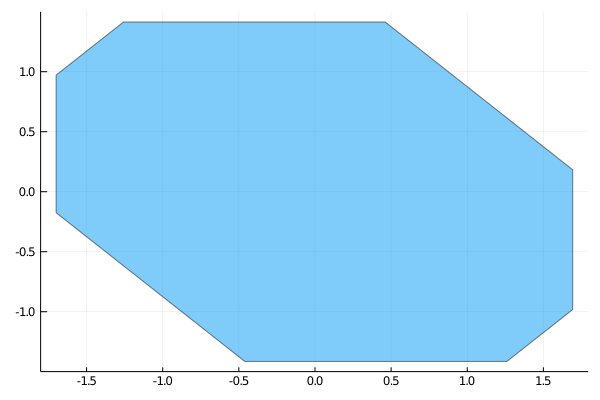

In [19]:
plot(q)

---

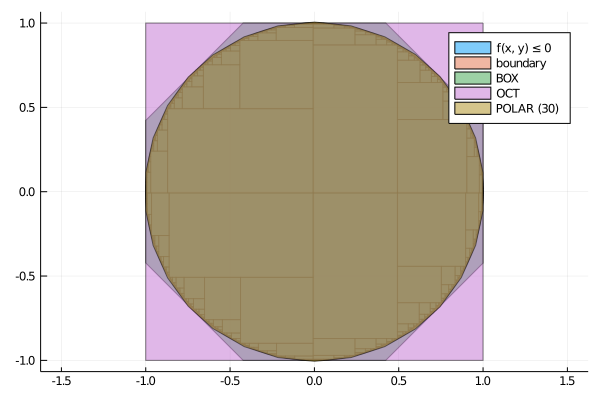

In [22]:
using IntervalConstraintProgramming, IntervalArithmetic, Plots

dom = IntervalBox(-2 .. 2, -2 .. 2)
C = @constraint x^2 + y^2 <= 1
p = pave(C, dom, 0.01)

plot(p.inner, lw=1, ratio=1, lab="f(x, y) ≤ 0", title="")
plot!(p.boundary, lw=1, ratio=1, lab="boundary")

plot!(overapproximate(p, OctDirections(2)), lab="BOX")
plot!(overapproximate(p, BoxDirections(2)), lab="OCT")
plot!(overapproximate(p, PolarDirections(30)), lab="POLAR (30)")